# <CENTER>TEXT CLASSIFICATION</CENTER>

# ASSIGNMENT-7 03/20/2024

## IMPORTING PANDAS TO READ FILE

loading a CSV file into a DataFrame and perform some initial data exploration by displaying the first few rows of the DataFrame. It also removes a column named 'Duplicated_issue' from the DataFrame

In [26]:
# Importing modules
import pandas as pd
 
# Read data into df
df = pd.read_csv("C:\\Users\\laxmi\\Desktop\\TextBasedAnalysis\\eclipse_jdt.csv")   # eclipse_jdk.csv
df = df.drop(columns=['Duplicated_issue'])
# Print head
df.head()


,Issue_id,Priority,Component,Title,Description,Status,Resolution,Version,Created_time,Resolved_time
0,1518,P1,Debug,Icons needed for actions (1GI5UXW),JGS (8/8/01 5:20:19 PM); \tWe need enabled; di...,VERIFIED,FIXED,2.0,2001-10-10 22:14:00 -0400,2001-10-18 11:51:14 -0400
1,1519,P3,Debug,README: Hit count not reset (1GET20Y),JGS (6/4/01 11:43:47 AM); \tSet a breakpoint i...,RESOLVED,WORKSFORME,2.0,2001-10-10 22:14:00 -0400,2001-11-28 13:42:46 -0500
2,1520,P3,Debug,Use styled text in console (1G9S1YF),DW (2/26/01 5:56:36 PM); \tCould allow users t...,CLOSED,WONTFIX,2.0,2001-10-10 22:14:00 -0400,2002-06-26 11:32:05 -0400
3,1521,P3,Debug,StringBuffer representation (1GE3BFA),JGS (5/21/01 2:09:10 PM); \tTo be consistent; ...,VERIFIED,FIXED,2.0,2001-10-10 22:14:00 -0400,2002-02-05 10:37:09 -0500
4,1522,P2,Debug,Feature: use #toString to display variable val...,DW (9/27/00 11:12:31 AM); \tCurrently; the typ...,RESOLVED,DUPLICATE,2.0,2001-10-10 22:14:00 -0400,2001-10-17 10:17:47 -0400


## VALUE COUNTS OF PRIORITY

This code snippet creates a bar plot to show the distribution of values in the 'Priority' column of a DataFrame (`df`).

<Axes: xlabel='Priority'>

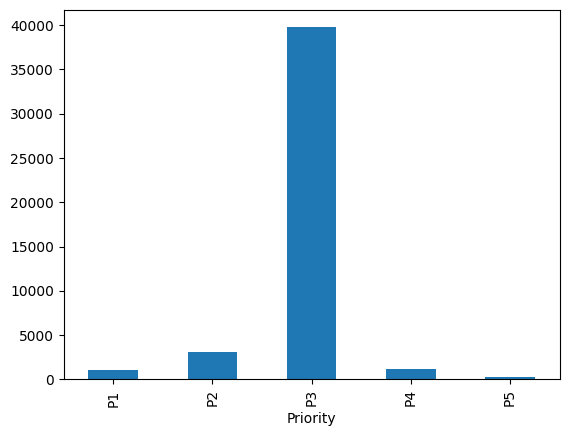

In [27]:
df['Priority'].value_counts().sort_index().plot(kind='bar')


## VALUE COUNTS OF COMPONENTS

This code snippet creates a bar plot to display the distribution of values in the 'Component' column of a DataFrame (`df`).

<Axes: xlabel='Component'>

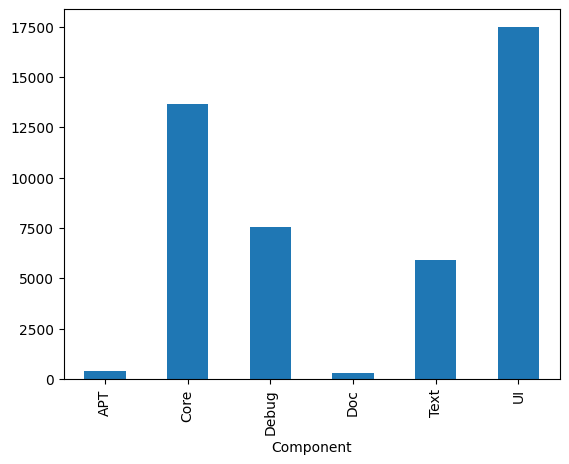

In [28]:
df['Component'].value_counts().sort_index().plot(kind='bar')


## FUNCTION TO REMOVE ANY ODD WORDS

This function `clean(text)` performs text cleaning by removing HTML escapes, HTML tags, markdown URLs, text or code in brackets, standalone sequences of special characters, standalone sequences of hyphens, and excess white spaces from the input text. After cleaning, it returns the processed text.

In [29]:
import html
import re
def clean(text):
    # convert html escapes like & to characters.
    text = html.unescape(text) 
    # tags like 
    text = re.sub(r'<[^<>]*>', ' ', text)
    # markdown URLs like [Some text](https://....)
    text = re.sub(r'\[([^\[\]]*)\]\([^\(\)]*\)', r'\1', text)
    # text or code in brackets like [0]
    text = re.sub(r'\[[^\[\]]*\]', ' ', text)
    # standalone sequences of specials, matches  but not #cool
    text = re.sub(r'(?:^|\s)[<>{}\[\]+|\\:-]{1,}(?:\s|$)', ' ', text)
    # standalone sequences of hyphens like --- or ==
    text = re.sub(r'(?:^|\s)[\-=\+]{2,}(?:\s|$)', ' ', text)
    # sequences of white spaces
    text = re.sub(r'\s+', ' ', text)
    return text.strip()


## DATA CLEANING

In [30]:
df = df[['Title','Description','Priority']]
df = df.dropna()
df['text'] = df['Title'] + ' ' + df['Description']
df = df.drop(columns=['Title','Description']) 
df['text'] = df['text'].apply(clean)
df = df[df['text'].str.len() > 50]
df.sample(2)


,Priority,text
17650,P3,SourceType#get*QualifiedName() methods return ...
31599,P3,Need new property tester to be used by JUnit 4...


## TRAINING AND SPLITTING DATA

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(df['text'],
                                                    df['Priority'],
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify=df['Priority'])

print('Size of Training Data ', X_train.shape[0])
print('Size of Test Data ', X_test.shape[0])


Size of Training Data  36040
Size of Test Data  9011


## CONVERTING X_TRAIN TO NUMBERS

This code snippet utilizes TF-IDF vectorization to convert text data into numerical features and prepares it for classification using Support Vector Machine (SVM).

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
tfidf = TfidfVectorizer(min_df = 10, ngram_range=(1,2), stop_words="english")
X_train_tf = tfidf.fit_transform(X_train)
X_test_tf = tfidf.transform(X_test)


## BUILDING THE MODEL

This code snippet demonstrates the training of a Linear Support Vector Classifier (LinearSVC) using the TF-IDF transformed training data (`X_train_tf`) and corresponding labels (`Y_train`). The `random_state` parameter is set to ensure reproducibility, and `tol` sets the tolerance for stopping criteria.

In [33]:
from sklearn.svm import LinearSVC

model1 = LinearSVC(random_state=0, tol=1e-5)
model1.fit(X_train_tf, Y_train)


C:\Users\laxmi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


LinearSVC(random_state=0, tol=1e-05)

## ACCURACY OF MODEL

This code snippet calculates the accuracy score of a trained model (`model1`) on the test data (`X_test_tf`) using the actual labels (`Y_test`). It imports the `accuracy_score` function from `sklearn.metrics` module and computes the accuracy by comparing the predicted labels (`Y_pred`) with the actual labels (`Y_test`). Finally, it prints the accuracy score.

In [34]:

#Accuracy: # of correct prediction/# of predictions

from sklearn.metrics import accuracy_score

Y_pred = model1.predict(X_test_tf)
print ('Accuracy Score - ', accuracy_score(Y_test, Y_pred))



Accuracy Score -  0.8761513705471091


## DUMMY CLASSIFIER

This code snippet demonstrates the use of a dummy classifier (`DummyClassifier`) as a baseline model for comparison. It initializes the dummy classifier with the strategy 'most_frequent', which predicts the most frequent class in the training data. The `random_state` parameter ensures reproducibility. The dummy classifier is then trained on the training data (`X_train`, `Y_train`) using the `fit()` method. After training, it predicts labels for the test data (`X_test`) using the `predict()` method and calculates the accuracy score by comparing the predicted labels (`Y_pred_baseline`) with the actual labels (`Y_test`). Finally, it prints the accuracy score.

In [35]:
from sklearn.dummy import DummyClassifier
clf = DummyClassifier(strategy='most_frequent', random_state=42)
clf.fit(X_train, Y_train)
Y_pred_baseline = clf.predict(X_test)
print ('Accuracy Score - ', accuracy_score(Y_test, Y_pred_baseline))


Accuracy Score -  0.8769281988680502


## CONFUSION MATRIX

This code snippet calculates the confusion matrix, a matrix that compares the predicted values to the actual values of all classified observations. It imports the `confusion_matrix` function from the `sklearn.metrics` module. The predicted labels (`Y_pred`) are compared with the actual labels (`Y_test`) using this function, providing insight into the model's performance in terms of true positives, true negatives, false positives, and false negatives.

In [39]:
#A matrix that compares the predicted values to the actual values of all classified observations.

from sklearn.metrics import confusion_matrix
Y_pred = model1.predict(X_test_tf)
confusion_matrix(Y_test, Y_pred)



array([[  19,    1,  199,    4,    0],
       [   6,   18,  576,    8,    0],
       [   8,   48, 7827,   19,    0],
       [   0,    5,  192,   31,    0],
       [   0,    0,   50,    0,    0]], dtype=int64)

## PLOTTING CONFUSION MATRIX

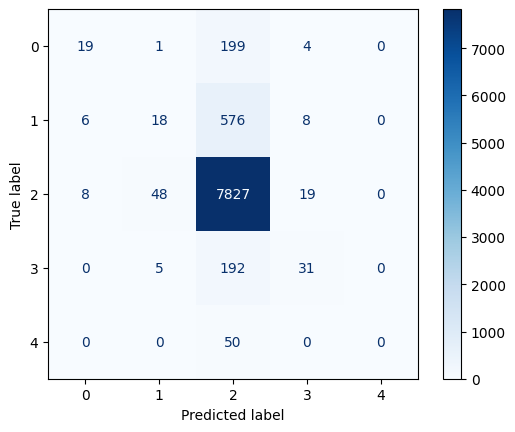

In [41]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Assuming you already have your model trained and stored in `model1`
# Replace `model1` with your trained model
predictions = model1.predict(X_test_tf)

# Compute the confusion matrix
conf_matrix = confusion_matrix(Y_test, predictions)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap=plt.cm.Blues)
plt.show()


## CLAASIFICATION REPORT

This code snippet generates a classification report using the `classification_report` function from the `sklearn.metrics` module. It provides a comprehensive summary of various classification metrics such as precision, recall, F1-score, and support for each class in the classification task. The report includes metrics for each class as well as the macro and weighted averages across all classes.

In [42]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred))


C:\Users\laxmi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  # set those with 0 denominator to `zero_division`, and 0 when "warn"


              precision    recall  f1-score   support

          P1       0.58      0.09      0.15       223
          P2       0.25      0.03      0.05       608
          P3       0.89      0.99      0.93      7902
          P4       0.50      0.14      0.21       228
          P5       0.00      0.00      0.00        50

    accuracy                           0.88      9011
   macro avg       0.44      0.25      0.27      9011
weighted avg       0.82      0.88      0.83      9011



C:\Users\laxmi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  # set those with 0 denominator to `zero_division`, and 0 when "warn"
C:\Users\laxmi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  # set those with 0 denominator to `zero_division`, and 0 when "warn"


## DOWN SAMPLING

This code balances the dataset by sampling 4000 bug reports with priority 'P3' and combining them with bug reports of other priorities, thus addressing the class imbalance issue.

In [43]:
# Filter bug reports with priority P3 and sample 4000 rows from it
df_sampleP3 = df[df['Priority'] == 'P3'].sample(n=4000, random_state=123)

# Create a separate dataframe containing all other bug reports
df_sampleRest = df[df['Priority'] != 'P3']

# Concatenate the two dataframes to create the new balanced bug reports dataset
df_balanced = pd.concat([df_sampleRest, df_sampleP3])

# Check the status of the class imbalance
df_balanced['Priority'].value_counts()


Priority
P3    4000
P2    3038
P4    1138
P1    1117
P5     252
Name: count, dtype: int64

## REPEATING EVERYTHING

In [44]:
# Loading the balanced dataframe

df = df_balanced[['text', 'Priority']]
df = df.dropna()

# Step 1 - Data Preparation

df['text'] = df['text'].apply(clean)

# Step 2 - Train-Test Split
X_train, X_test, Y_train, Y_test = train_test_split(df['text'],
                                                    df['Priority'],
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify=df['Priority'])
print('Size of Training Data ', X_train.shape[0])
print('Size of Test Data ', X_test.shape[0])

# Step 3 - Training the Machine Learning model

tfidf = TfidfVectorizer(min_df=10, ngram_range=(1, 2), stop_words="english")
X_train_tf = tfidf.fit_transform(X_train)

model1 = LinearSVC(random_state=0, tol=1e-5)
model1.fit(X_train_tf, Y_train)

# Step 4 - Model Evaluation

X_test_tf = tfidf.transform(X_test)
Y_pred = model1.predict(X_test_tf)
print('Accuracy Score - ', accuracy_score(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))


Size of Training Data  7636
Size of Test Data  1909


C:\Users\laxmi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Accuracy Score -  0.5028810895756941
              precision    recall  f1-score   support

          P1       0.44      0.29      0.35       223
          P2       0.45      0.48      0.46       608
          P3       0.56      0.66      0.60       800
          P4       0.47      0.34      0.39       228
          P5       0.00      0.00      0.00        50

    accuracy                           0.50      1909
   macro avg       0.38      0.35      0.36      1909
weighted avg       0.48      0.50      0.49      1909



## REPEATING EVERYTHING

In [46]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
# Flag that determines the choice of SVC (True) and LinearSVC (False)
runSVC = True
df = pd.read_csv("C:\\Users\\laxmi\\Desktop\\TextBasedAnalysis\\eclipse_jdt.csv")
df = df.drop(columns=['Duplicated_issue'])
df = df[['Title', 'Description', 'Component']]
df = df.dropna()
df['text'] = df['Title'] + df['Description']
df = df.drop(columns=['Title', 'Description'])
# Step 1 - Data Preparation
df['text'] = df['text'].apply(clean)
df = df[df['text'].str.len() > 50]
if (runSVC):
    # Sample the data when running SVC to ensure reasonable run-times
    df = df.groupby('Component', as_index=False).apply(pd.DataFrame.sample,
                                                       random_state=42,
                                                       frac=.2)
# Step 2 - Train-Test Split
X_train, X_test, Y_train, Y_test = train_test_split(df['text'],
                                                    df['Component'],
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify=df['Component'])
print('Size of Training Data ', X_train.shape[0])
print('Size of Test Data ', X_test.shape[0])
# Step 3 - Training the Machine Learning model
tfidf = TfidfVectorizer(stop_words="english")
if (runSVC):
    model = SVC(random_state=42, probability=True)
    grid_param = [{
        'tfidf__min_df': [5, 10],
        'tfidf__ngram_range': [(1, 3), (1, 6)],
        'model__C': [1, 100],
        'model__kernel': ['linear']
    }]
else:
    model = LinearSVC(random_state=42, tol=1e-5)
    grid_param = {
        'tfidf__min_df': [5, 10],
        'tfidf__ngram_range': [(1, 3), (1, 6)],
        'model__C': [1, 100],
        'model__loss': ['hinge']
    }
training_pipeline = Pipeline(
    steps=[('tfidf', TfidfVectorizer(stop_words="english")), ('model', model)])
gridSearchProcessor = GridSearchCV(estimator=training_pipeline,
                                   param_grid=grid_param,
                                   cv=5)
gridSearchProcessor.fit(X_train, Y_train)
best_params = gridSearchProcessor.best_params_
print("Best alpha parameter identified by grid search ", best_params)

best_result = gridSearchProcessor.best_score_
print("Best result identified by grid search ", best_result)

best_model = gridSearchProcessor.best_estimator_

# Step 4 - Model Evaluation

Y_pred = best_model.predict(X_test)
print('Accuracy Score - ', accuracy_score(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))


C:\Users\laxmi\AppData\Local\Temp\ipykernel_12312\487982013.py:17: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby('Component', as_index=False).apply(pd.DataFrame.sample,


Size of Training Data  7208
Size of Test Data  1802
Best alpha parameter identified by grid search  {'model__C': 1, 'model__kernel': 'linear', 'tfidf__min_df': 5, 'tfidf__ngram_range': (1, 6)}
Best result identified by grid search  0.7358510088444129
Accuracy Score -  0.7386237513873474
              precision    recall  f1-score   support

         APT       1.00      0.31      0.48        16
        Core       0.75      0.78      0.76       545
       Debug       0.90      0.77      0.83       300
         Doc       0.67      0.33      0.44        12
        Text       0.65      0.47      0.54       235
          UI       0.70      0.81      0.75       694

    accuracy                           0.74      1802
   macro avg       0.78      0.58      0.63      1802
weighted avg       0.74      0.74      0.73      1802

